In [1]:
from skimage import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
pic = io.imread('data/bird_small.png')/255

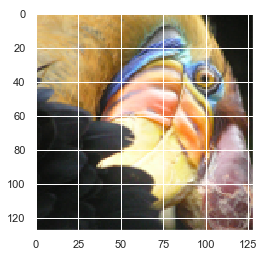

In [3]:
sns.set()
plt.imshow(pic)

In [27]:
pic = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])

In [5]:
def find_centroids(x, centroids):
    return np.argmin(np.apply_along_axis
                     (func1d=np.linalg.norm, axis=1, arr=centroids-x))

In [6]:
def combine_data_C(data, C):
    data_with_C = data.copy()
    data_with_C['C'] = C
    return data_with_C

In [7]:
def random_init(data, K):
    return data.sample(K).values

In [8]:
def assign_cluster(data, centroids):
    return np.apply_along_axis(lambda x: find_centroids(x, centroids),
                               axis=1, arr=data.values)

In [9]:
def new_centroids(data, C):
    data_with_C = combine_data_C(data, C)
    return data_with_C\
        .groupby('C', as_index=False)\
        .mean()\
        .sort_values(by='C').drop('C', axis=1).values

In [10]:
def cost(data, C, centroids):
    m = data.shape[0]
    expand_C_with_centroids = centroids[C]
    distances = np.apply_along_axis(func1d=np.linalg.norm,
                                    axis=1,
                                    arr=data.values - expand_C_with_centroids)
    return np.sum(distances) / m

In [11]:
def kmeans_iters(data, K, epoch=100, tol=0.00001):
    centroids = random_init(data, K)
    cost_progress = []
    for i in range(epoch):
        print('running epoch {}'.format(i))
        C = assign_cluster(data, centroids)
        cost_progress.append(cost(data, C, centroids))
        centroids = new_centroids(data, C)
        if(len(cost_progress) > 1):
            if (np.abs(cost_progress[-1] - cost_progress[-2])/cost_progress[-1] < tol):
                break
    return C, centroids, cost_progress[-1]

In [29]:
def _Kmeans(data, K, epoch=100, n_init=10):
    tries = np.array([kmeans_iters(data, K,epoch) for _ in range(n_init)])
    least_centroid = np.argmin(tries[:,-1])
    return tries[least_centroid] 

In [30]:
C, centroids, cost = _Kmeans(pd.DataFrame(pic), 32, epoch = 10, n_init=2)

running epoch 0


TypeError: 'numpy.float64' object is not callable

In [14]:
centroids

array([[0.81951624, 0.67287248, 0.39347932],
       [0.0973191 , 0.10466021, 0.09411765],
       [0.06023276, 0.06591191, 0.0560684 ],
       [0.97533987, 0.93128758, 0.70151634],
       [0.63103283, 0.57402607, 0.56298512],
       [0.94654884, 0.85047041, 0.55688033],
       [0.85374369, 0.73333885, 0.4911944 ],
       [0.45155001, 0.36734217, 0.32199949],
       [0.92511221, 0.61806441, 0.28950311],
       [0.98433646, 0.96129014, 0.84646775],
       [0.12217465, 0.13142305, 0.12227565],
       [0.16331436, 0.1662895 , 0.15865252],
       [0.79943757, 0.70813976, 0.70427212],
       [0.22848687, 0.21456054, 0.20717193],
       [0.90571895, 0.50840336, 0.1695845 ],
       [0.38428014, 0.27052106, 0.19423941],
       [0.50207929, 0.36234648, 0.16501832],
       [0.49791116, 0.61555822, 0.81290116],
       [0.29174273, 0.29425287, 0.31547498],
       [0.57840789, 0.44562639, 0.30819537],
       [0.96748033, 0.80089814, 0.7086568 ],
       [0.7625931 , 0.58967168, 0.29752242],
       [0.

In [15]:
centroids.shape

(32, 3)

In [16]:
r_img = centroids[C]

In [18]:
r_img = r_img.reshape((128,128,3))

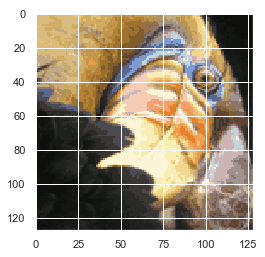

In [20]:
plt.imshow(r_img)

In [31]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters=16,n_init=2,n_jobs=-1)

In [47]:
model.fit(pic)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=2, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
C = model.predict(pic)

In [50]:
centroids = model.cluster_centers_

In [51]:
compressed_pic = centroids[C].reshape((128,128,3))

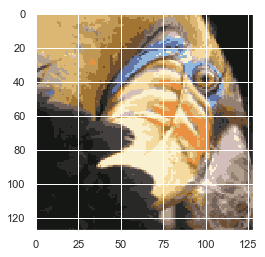

In [52]:
plt.imshow(compressed_pic)